## Evaluation Project

### Glass Identification Dataset


#### Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

#### Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

In [71]:
## imported Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import os, math
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('glassIdentification.csv')

In [55]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [56]:
df.shape

(214, 11)

### 2) check data type of each column

In [57]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

#### There are some catagorical columns Needs to perform encoding technique



In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


### what we observed up to
1) No Null values are present in the data set

2) only int and obj data we have

In [59]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [60]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass


In [61]:
df.shape
#data size is small
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [62]:
df.values[50:60, :]


array([[51.     ,  1.5232 , 13.72   ,  3.72   ,  0.51   , 71.75   ,
         0.09   , 10.06   ,  0.     ,  0.16   ,  1.     ],
       [52.     ,  1.51926, 13.2    ,  3.33   ,  1.28   , 72.36   ,
         0.6    ,  9.14   ,  0.     ,  0.11   ,  1.     ],
       [53.     ,  1.51808, 13.43   ,  2.87   ,  1.19   , 72.84   ,
         0.55   ,  9.03   ,  0.     ,  0.     ,  1.     ],
       [54.     ,  1.51837, 13.14   ,  2.84   ,  1.28   , 72.85   ,
         0.55   ,  9.07   ,  0.     ,  0.     ,  1.     ],
       [55.     ,  1.51778, 13.21   ,  2.81   ,  1.29   , 72.98   ,
         0.51   ,  9.02   ,  0.     ,  0.09   ,  1.     ],
       [56.     ,  1.51769, 12.45   ,  2.71   ,  1.29   , 73.7    ,
         0.56   ,  9.06   ,  0.     ,  0.24   ,  1.     ],
       [57.     ,  1.51215, 12.99   ,  3.47   ,  1.12   , 72.98   ,
         0.62   ,  8.35   ,  0.     ,  0.31   ,  1.     ],
       [58.     ,  1.51824, 12.87   ,  3.48   ,  1.29   , 72.95   ,
         0.6    ,  8.43   ,  0.     ,  0.  

In [63]:
df['Type'].value_counts()



KeyError: 'Type'

In [64]:
target = {k: v for k, v in zip(df['Type of glass'].unique(), list(range(len(df['Type of glass'].unique()))))}
df['Type of glass'] = df['Type of glass'].map(target)
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,5
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,5
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,5
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,5


<Figure size 1000x600 with 0 Axes>

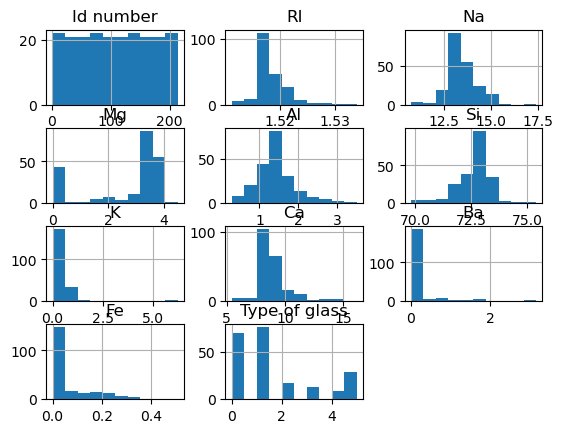

In [65]:
plt.figure(figsize=(10,6))
df.hist()
plt.show()

In [66]:
target = df.values[:, -1]
counter = Counter(target)

for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.2f%%' % (k,v,per))

Class=0, Count=70, Percentage=32.71%
Class=1, Count=76, Percentage=35.51%
Class=2, Count=17, Percentage=7.94%
Class=3, Count=13, Percentage=6.07%
Class=4, Count=9, Percentage=4.21%
Class=5, Count=29, Percentage=13.55%


## Model Building


In [67]:
def load_dataset(file_path):
    df = pd.read_csv(file_path, header=0)
    
    data = df.values
    #Split data into input and output
    X, y = data[:, :-1], data[:, -1]
    # Encode the label data
    y = LabelEncoder().fit_transform(y)
    
    return X, y
    
# Evaluate the model
def evaluate_model(X, y, model):
    K = 5
    R = 3
    # K-Fold on the data
    cv = RepeatedStratifiedKFold(n_splits=K, n_repeats=R, random_state=1)
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores

def get_models():
    models, names = list(), list()
    # SVM
    models.append(SVC(gamma='auto'))
    names.append('SVC')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    
    return models, names

>SVC 0.973 (0.029)
>KNN 0.977 (0.023)
>BAG 0.981 (0.021)
>RF 0.972 (0.030)
>ET 0.981 (0.021)


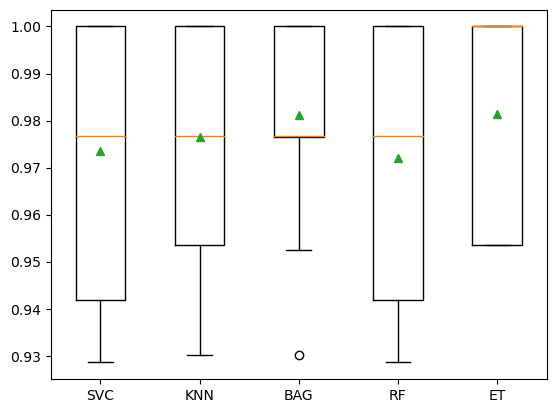

In [68]:
file_path = 'glassIdentification.csv'

X, y = load_dataset(file_path)

models, names = get_models()

results = list()

for i in range(len(models)):
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# RandomForestClassifier

In [69]:
class_weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}

rf_model = RandomForestClassifier(n_estimators=1000, class_weight=class_weights)

et_model = ExtraTreesClassifier(n_estimators=1000, class_weight=class_weights)

#Evaluate model
scores = evaluate_model(X, y, rf_model)
et_score = evaluate_model(X, y, et_model)

print("RF Mean Accuracy: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))
print("ET Mean Accuracy: %.3f (%.3f)" % (np.mean(et_score), np.std(et_score)))

RF Mean Accuracy: 0.975 (0.029)
ET Mean Accuracy: 0.980 (0.022)


## Making Predictions


In [70]:
rf_model.fit(X, y)

row = [ 1.5232,13.72, 3.72,0.51, 71.75,  0.09 ,10.06 ,  0.0,  0.16  ]

print('>Predicted=%d (expected 0)' % (rf_model.predict([row])))

ValueError: X has 9 features, but RandomForestClassifier is expecting 10 features as input.